# Probable maximum precipitation

Probable maximum precipitation (PMP): The theoretical maximum depth of precipitation that can occur over a specified area at a certain time of year.


The probable maximum precipitation for a specific duration (m) is given as:

$$ P_m = \overline{P} + k_m\sigma_p $$

$k_m$ is described by the Hurst-Kolmogorov distribution for extreme values – Koutsoyiannis (1999):

$$F(k_m) = \exp \left\{ - \left[ 1 + \frac{0.13(k_m - 0.44)}{0.60} \right]^{-7.69} \right\}$$

This equation was fitted using a particular dataset, and may not perform as well in other places. We could instead fit the extreme value distribution to observations in a location of interest.  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev

## Import rainfall data

Here, we are using daily rainfall data from the CMH airport.

Pandas can parse the dates in the file, and we'll use the date as the index column for the dataset.

In this example, we are going to load some sample data from my GitHub repository. But you could also use the commented-out section of code below to load files from your Google drive folder instead.

In [2]:
# # To access data files from your Google drive (if using Google Colab)
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/3160/CMH_1945_2021.csv', parse_dates=['DATE'], index_col='DATE')

In [3]:
# Loading rainfall data from GitHub repo
data_url = 'https://raw.githubusercontent.com/jemissik/CIVILEN3160/main/data/CMH_1945_2021.csv'
df = pd.read_csv(data_url, parse_dates=["DATE"], index_col="DATE")


In [ ]:
# # To load data from a local file
# # Read the CSV data into a pandas DataFrame
# filein = 'data/CMH_1945_2021.csv'
# df = pd.read_csv(filein, parse_dates=['DATE'], index_col='DATE')

In [4]:
df

,STATION,NAME,PRCP
DATE,,,
1945-04-01,USW00014821,"JOHN GLENN INTERNATIONAL AIRPORT, OH US",NaN
1945-04-02,USW00014821,"JOHN GLENN INTERNATIONAL AIRPORT, OH US",NaN
1945-04-03,USW00014821,"JOHN GLENN INTERNATIONAL AIRPORT, OH US",NaN
1945-04-04,USW00014821,"JOHN GLENN INTERNATIONAL AIRPORT, OH US",NaN
1945-04-05,USW00014821,"JOHN GLENN INTERNATIONAL AIRPORT, OH US",NaN
...,...,...,...
2022-10-28,USW00014821,"JOHN GLENN INTERNATIONAL AIRPORT, OH US",0.00
2022-10-29,USW00014821,"JOHN GLENN INTERNATIONAL AIRPORT, OH US",0.00
2022-10-30,USW00014821,"JOHN GLENN INTERNATIONAL AIRPORT, OH US",0.06


## Plot the raw precipitation data

It's always important to check any dataset you're working with to make sure there aren't any issues (e.g., numeric missing value codes, etc)

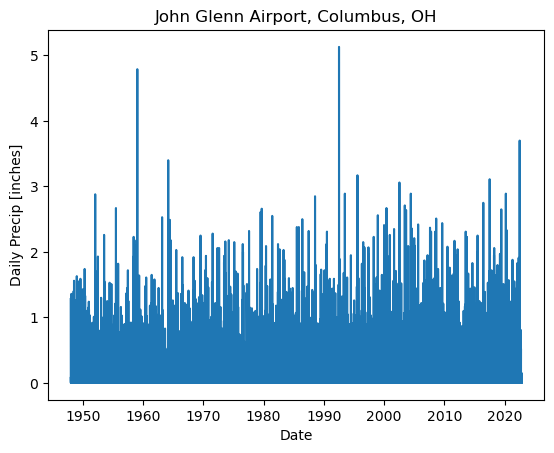

In [5]:
plt.figure(1)
plt.plot(df.PRCP)  # The index column will be used for the x-axis if not otherwise specified
plt.xlabel('Date')
plt.ylabel('Daily Precip [inches]')
plt.title('John Glenn Airport, Columbus, OH')
plt.show()

In [6]:
# It's easy to get some basic statistics about the dataset:
df.PRCP.describe()

count    27334.00000
mean         0.10810
std          0.27506
min          0.00000
25%          0.00000
50%          0.00000
75%          0.06000
max          5.13000
Name: PRCP, dtype: float64

## Calculate the Annual Maximum Daily precipitation

This dataset already has a 1-day duration, so we don't need to do any aggregation to get to the correct duration.

If we needed to aggregate to a different duration, we could use the [resample function in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

But in this case we just need to find the maximum value for each year:

In [7]:
annual_p_max = df.groupby(df.index.year)['PRCP'].max()

In [8]:
annual_p_max

DATE
1945     NaN
1948    1.56
1949    1.63
1950    1.74
1951    1.24
        ... 
2018    2.06
2019    2.65
2020    2.89
2021    1.88
2022    3.70
Name: PRCP, Length: 76, dtype: float64

In [9]:
# If we want to count how many years have missing data
sum(pd.isna(annual_p_max))

1

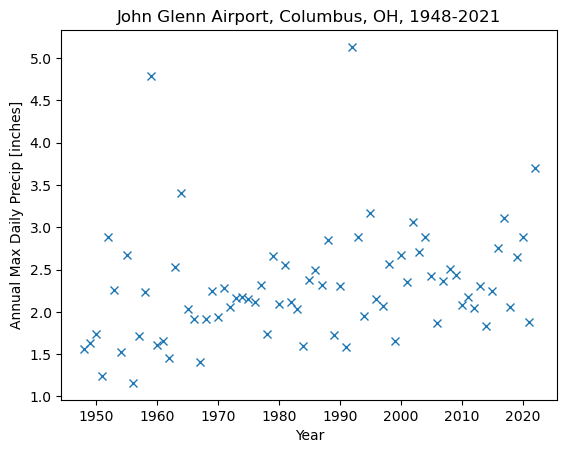

In [10]:
# Plot Annual Max Daily Precip
plt.figure(2)
plt.plot(annual_p_max, 'x')
plt.xlabel('Year')
plt.ylabel('Annual Max Daily Precip [inches]')
plt.title('John Glenn Airport, Columbus, OH, 1948-2021')
plt.show()

## Fitting the generalized extreme value distribution

Here, we will use the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html#scipy.stats.genextreme) module to fit the GEV distribution:

In [11]:
# Fitting extreme value distribution
AMRdt = annual_p_max.dropna()
Params = gev.fit(AMRdt)
T = np.arange(2, 101)
PT = gev.ppf((1 - 1/T), *Params)

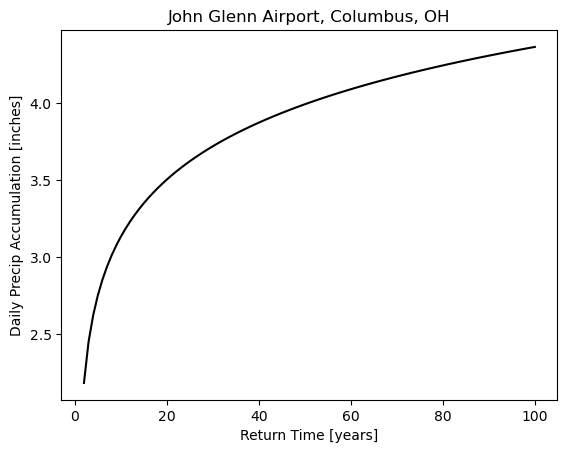

In [12]:
# Plotting the fitted distribution of precipitation
plt.figure(3)
plt.plot(T, PT, 'k')
plt.xlabel('Return Time [years]')
plt.ylabel('Daily Precip Accumulation [inches]')
plt.title('John Glenn Airport, Columbus, OH')
plt.show()

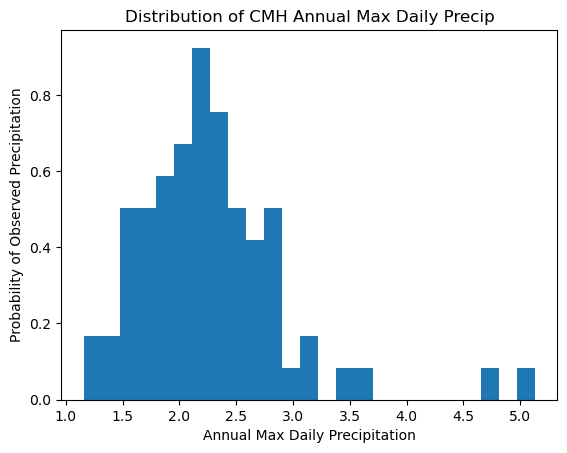

In [13]:
# Histogram (empirical distribution) of AMR
plt.figure(4)
plt.hist(AMRdt, bins=25, density=True)
plt.xlabel('Annual Max Daily Precipitation')
plt.ylabel('Probability of Observed Precipitation')
plt.title('Distribution of CMH Annual Max Daily Precip')
plt.show()